In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [2]:
from autoimpute.imputations import MiceImputer

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [3]:
pd.set_option('display.max_columns', None)

In [4]:
data=pd.read_csv("C:\\Users\\sachi\\Downloads\\widsdatathon2021\\TrainingWiDS2021.csv")

In [5]:
data.head()

,Unnamed: 0,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
0,1,214826,118,68.0,22.732803,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,73.9,2.3,113.0,502.01,0,0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0,40.0,NaN,NaN,NaN,NaN,36.0,134.0,39.3,NaN,0,14.1,46.0,32.0,68.0,37.0,68.0,37.0,119.0,72.0,66.0,40.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,122.0,64.0,131.0,73.0,131.0,73.0,39.9,37.2,NaN,NaN,68.0,63.0,68.0,63.0,119.0,108.0,NaN,NaN,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,NaN,NaN,131.0,115.0,131.0,115.0,39.5,37.5,2.3,2.3,0.4,0.4,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,NaN,NaN,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,1
1,2,246060,81,77.0,27.421875,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0,70.2,NaN,108.0,203.01,0,0,NaN,9.0,0.56,1.0,1.0,3.0,0.0,1.0,145.0,120.0,36.9,0,46.0,37.0,37.0,51.0,7.45,33.0,145.0,35.1,NaN,1,12.7,NaN,NaN,95.0,31.0,95.0,31.0,118.0,72.0,NaN,NaN,1

In [6]:
del data['Unnamed: 0']

In [7]:
data.head()

,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
0,214826,118,68.0,22.732803,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,73.9,2.3,113.0,502.01,0,0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0,40.0,NaN,NaN,NaN,NaN,36.0,134.0,39.3,NaN,0,14.1,46.0,32.0,68.0,37.0,68.0,37.0,119.0,72.0,66.0,40.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,122.0,64.0,131.0,73.0,131.0,73.0,39.9,37.2,NaN,NaN,68.0,63.0,68.0,63.0,119.0,108.0,NaN,NaN,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,NaN,NaN,131.0,115.0,131.0,115.0,39.5,37.5,2.3,2.3,0.4,0.4,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,NaN,NaN,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,1
1,246060,81,77.0,27.421875,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0,70.2,NaN,108.0,203.01,0,0,NaN,9.0,0.56,1.0,1.0,3.0,0.0,1.0,145.0,120.0,36.9,0,46.0,37.0,37.0,51.0,7.45,33.0,145.0,35.1,NaN,1,12.7,NaN,NaN,95.0,31.0,95.0,31.0,118.0,72.0,NaN,NaN,120.0,38.0,120.0

In [8]:
data_raw=data.copy()

In [9]:
data.shape

(130157, 180)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130157 entries, 0 to 130156
Columns: 180 entries, encounter_id to diabetes_mellitus
dtypes: float64(157), int64(17), object(6)
memory usage: 178.7+ MB


In [11]:
data.describe()

,encounter_id,hospital_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
count,130157.000000,130157.000000,125169.000000,125667.000000,130157.000000,128080.000000,130157.000000,130157.000000,130157.0,126694.000000,51994.000000,128472.000000,129292.000000,130157.000000,130157.000000,47597.000000,104746.000000,105275.000000,30437.000000,127967.000000,127967.000000,129448.000000,127967.000000,115461.000000,129848.000000,103399.000000,130157.000000,129737.000000,30437.000000,30437.000000,30437.000000,30437.000000,129349.000000,105638.00000,123546.000000,66990.000000,130157.000000,100682.000000,35089.000000,35089.000000,129880.000000,129880.000000,128521.000000,128521.000000,129895.000000,129895.000000,35289.000000,35289.000000,129830.000000,129830.000000,127929.000000,127929.000000,129474.000000,129474.000000,129625.000000,129625.000000,35119.000000,35119.000000,129886.000000,129886.000000,128534.000000,128534.000000,125663.000000,125663.000000,25328.000000,25328.000000,124630.000000,124630.000000,118818.000000,118818.000000,126083.000000,126083.000000,25391.000000,25391.000000,123627.000000,123627.000000,116860.000000,116860.000000,123703.000000,123703.000000,123915.000000,123915.000000,25350.000000,25350.00000,124638.000000,124638.000000,11

In [12]:
data.describe(include='all')

,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
count,130157.000000,130157.000000,125169.000000,125667.000000,130157.000000,128570,130091,128080.000000,96959,129917,130157.000000,130157,130157,130157.000000,130157.0,126694.000000,51994.000000,128472.000000,129292.000000,130157.000000,130157.000000,47597.000000,104746.000000,105275.000000,30437.000000,127967.000000,127967.000000,129448.000000,127967.000000,115461.000000,129848.000000,103399.000000,130157.000000,129737.000000,30437.000000,30437.000000,30437.000000,30437.000000,129349.000000,105638.00000,123546.000000,66990.000000,130157.000000,100682.000000,35089.000000,35089.000000,129880.000000,129880.000000,128521.000000,128521.000000,129895.000000,129895.000000,35289.000000,35289.000000,129830.000000,129830.000000,127929.000000,127929.000000,129474.000000,129474.000000,129625.000000,129625.000000,35119.000000,35119.000000,129886.000000,129886.000000,128534.000000,128534.000000,125663.000000,125663.000000,25328.000000,25328.000000,124630.000000,124630.000000,118818.000000,118818.000000,126083.000000,126083.000000,25391.000000,25391.000000,123627.000000,123627.000000,116860.000000,11686

In [13]:
target=data['diabetes_mellitus'].value_counts()

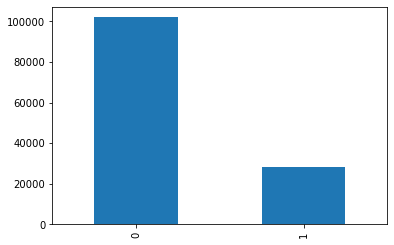

In [14]:
target.plot(kind='bar')
plt.show()

In [15]:
target

0    102006
1     28151
Name: diabetes_mellitus, dtype: int64

In [16]:
target/len(data) * 100

0    78.371505
1    21.628495
Name: diabetes_mellitus, dtype: float64

<AxesSubplot:>

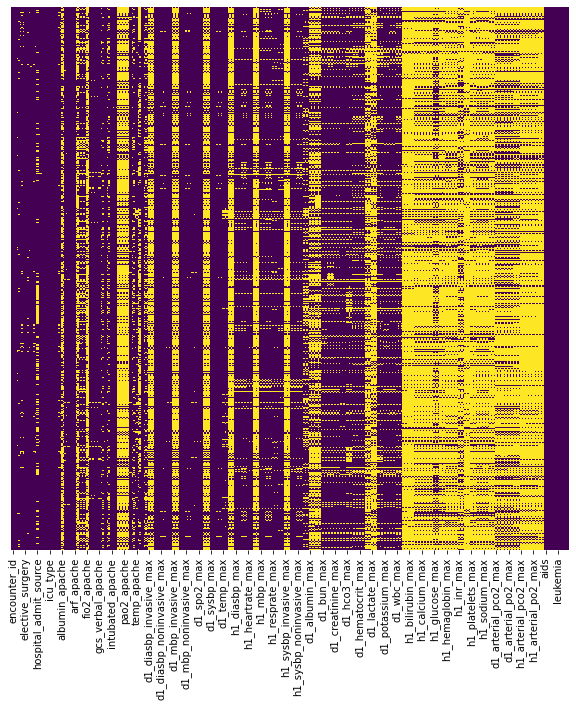

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(data.isnull(), yticklabels=False,cbar=False,cmap='viridis')

In [18]:
missing_val=pd.DataFrame(data.isnull().mean()*100)

In [19]:
missing_val.columns={'percent'}

In [20]:
missing_val.head()

,percent
encounter_id,0.000000
hospital_id,0.000000
age,3.832295
bmi,3.449680
elective_surgery,0.000000


In [21]:
many_missing_vals=missing_val[missing_val['percent']>80]

In [22]:
many_missing_vals.reset_index(inplace=True)

In [23]:
many_missing_vals

,index,percent
0,h1_diasbp_invasive_max,80.540424
1,h1_diasbp_invasive_min,80.540424
2,h1_mbp_invasive_max,80.492021
3,h1_mbp_invasive_min,80.492021
4,h1_sysbp_invasive_max,80.523522
5,h1_sysbp_invasive_min,80.523522
6,h1_albumin_max,91.431886
7,h1_albumin_min,91.431886
8,h1_bilirubin_max,92.089553
9,h1_bilirubin_min,92.089553


In [24]:
many_missing_cols=many_missing_vals['index'].to_list()

In [25]:
many_missing_cols

['h1_diasbp_invasive_max',
 'h1_diasbp_invasive_min',
 'h1_mbp_invasive_max',
 'h1_mbp_invasive_min',
 'h1_sysbp_invasive_max',
 'h1_sysbp_invasive_min',
 'h1_albumin_max',
 'h1_albumin_min',
 'h1_bilirubin_max',
 'h1_bilirubin_min',
 'h1_bun_max',
 'h1_bun_min',
 'h1_calcium_max',
 'h1_calcium_min',
 'h1_creatinine_max',
 'h1_creatinine_min',
 'h1_hco3_max',
 'h1_hco3_min',
 'h1_lactate_max',
 'h1_lactate_min',
 'h1_platelets_max',
 'h1_platelets_min',
 'h1_wbc_max',
 'h1_wbc_min',
 'h1_arterial_pco2_max',
 'h1_arterial_pco2_min',
 'h1_arterial_ph_max',
 'h1_arterial_ph_min',
 'h1_arterial_po2_max',
 'h1_arterial_po2_min',
 'h1_pao2fio2ratio_max',
 'h1_pao2fio2ratio_min']

In [26]:
data.corr()

,encounter_id,hospital_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
encounter_id,1.000000,-0.001463,-0.001376,0.003641,0.001618,0.001393,-0.001498,-0.001066,NaN,0.004438,0.002735,-0.001479,-0.000601,0.000235,-0.000847,-0.005932,0.000167,0.000169,0.000061,0.001883,0.003879,-0.003411,0.004025,0.000740,-0.003655,0.001064,-0.001683,-0.000002,0.013037,0.013037,-0.003911,-0.006254,-0.000321,-0.001485,-0.001900,0.005620,0.000895,0.002625,-0.000695,0.000657,-0.000160,0.002173,-0.000007,0.002548,-0.002914,0.003341,-0.001686,0.000032,0.000266,0.002035,0.000118,0.002068,0.000701,-0.003744,0.003453,-0.001265,-0.000792,0.003566,-0.001171,0.002622,-0.000790,0.002875,-0.000980,-0.000457,-0.009330,-0.003877,-0.002781,-0.001297,-0.002658,-0.001385,-0.004441,-0.002790,0.000758,0.005450,-0.003084,-0.000286,-0.002409,0.000324,-0.002501,-0.004808,0.002944,0.001030,-0.005521,0.005427,-0.001310,0.001102,-0.000865,0.002220,0.000834,0.000300,0.004710,0.002762,-0.005106,-0.005446,-0.001055,-0.001039,-0.001618,-0.000450,-0.001575,-0.001260,0.000713,0.003506,0.002948,0.000462,-0.000342,-0.000139,0.000821,0.000524,-0.008840,-0.005428,-0.004754,-0.002506,0.002170,0.002032,-0.001162,-0.001893,0.000057,-0.002027,0.001883,0.003541,-0.006193,-0.006446,-0.004855,-0.00

<AxesSubplot:>

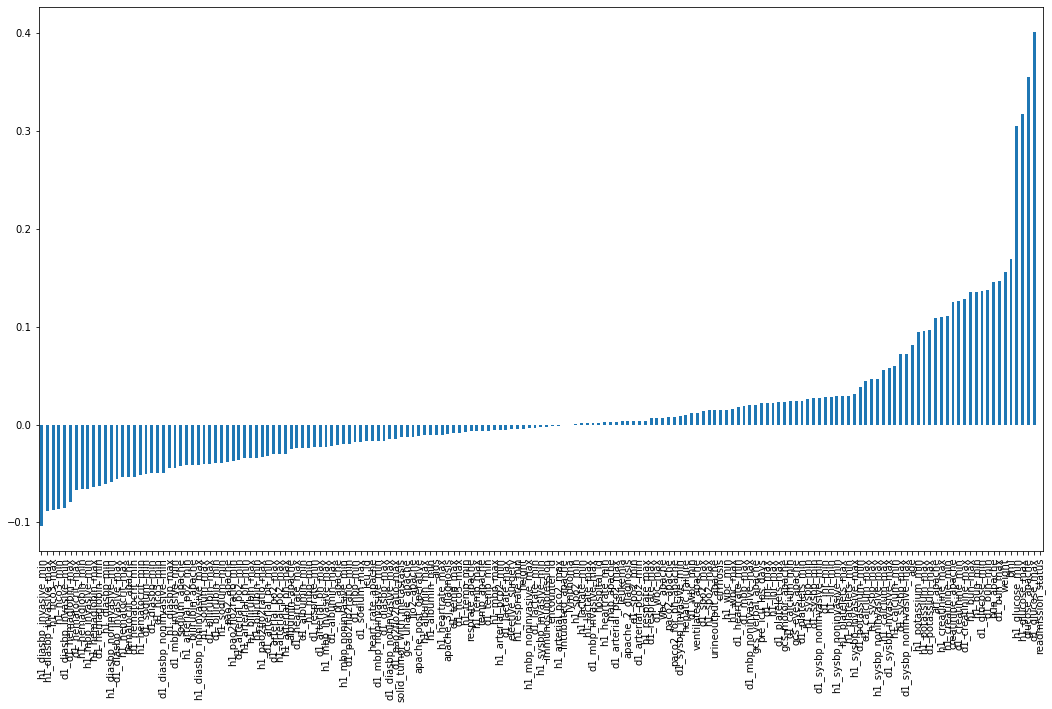

In [27]:
plt.figure(figsize=(18,10))
data.corr()['diabetes_mellitus'][:-1].sort_values().plot(kind='bar')

In [28]:
correlations=pd.DataFrame(data.corr()['diabetes_mellitus'][:-1].sort_values().abs())

In [29]:
correlations.reset_index(inplace=True)

In [30]:
correlations

,index,diabetes_mellitus
0,h1_diasbp_invasive_min,0.103672
1,h1_diasbp_invasive_max,0.088664
2,h1_hco3_max,0.086883
3,h1_hco3_min,0.086548
4,d1_diasbp_invasive_min,0.084994
...,...,...
168,h1_glucose_min,0.304520
169,h1_glucose_max,0.316847
170,glucose_apache,0.354359
171,d1_glucose_max,0.400742


In [31]:
low_correlations=correlations[correlations['diabetes_mellitus']<0.05]['index'].to_list()

In [32]:
low_correlations

['d1_diasbp_min',
 'd1_hco3_min',
 'd1_diasbp_noninvasive_min',
 'h1_diasbp_max',
 'd1_mbp_invasive_min',
 'sodium_apache',
 'h1_arterial_po2_min',
 'bilirubin_apache',
 'h1_diasbp_noninvasive_max',
 'h1_sodium_max',
 'd1_bilirubin_max',
 'd1_bilirubin_min',
 'h1_sodium_min',
 'pao2_apache',
 'h1_pao2fio2ratio_min',
 'd1_arterial_po2_min',
 'h1_arterial_ph_min',
 'h1_bilirubin_max',
 'h1_bilirubin_min',
 'h1_pao2fio2ratio_max',
 'd1_arterial_ph_min',
 'd1_arterial_po2_max',
 'h1_arterial_po2_max',
 'h1_arterial_ph_max',
 'albumin_apache',
 'd1_heartrate_max',
 'd1_albumin_min',
 'h1_mbp_min',
 'd1_resprate_min',
 'd1_arterial_ph_max',
 'h1_mbp_invasive_max',
 'd1_albumin_max',
 'ph_apache',
 'h1_mbp_noninvasive_min',
 'd1_pao2fio2ratio_min',
 'd1_mbp_min',
 'd1_sodium_max',
 'icu_id',
 'heart_rate_apache',
 'd1_mbp_noninvasive_min',
 'd1_diasbp_max',
 'd1_diasbp_noninvasive_max',
 'd1_pao2fio2ratio_max',
 'solid_tumor_with_metastasis',
 'gcs_unable_apache',
 'fio2_apache',
 'apache_pos

In [33]:
len(low_correlations)

126

<AxesSubplot:>

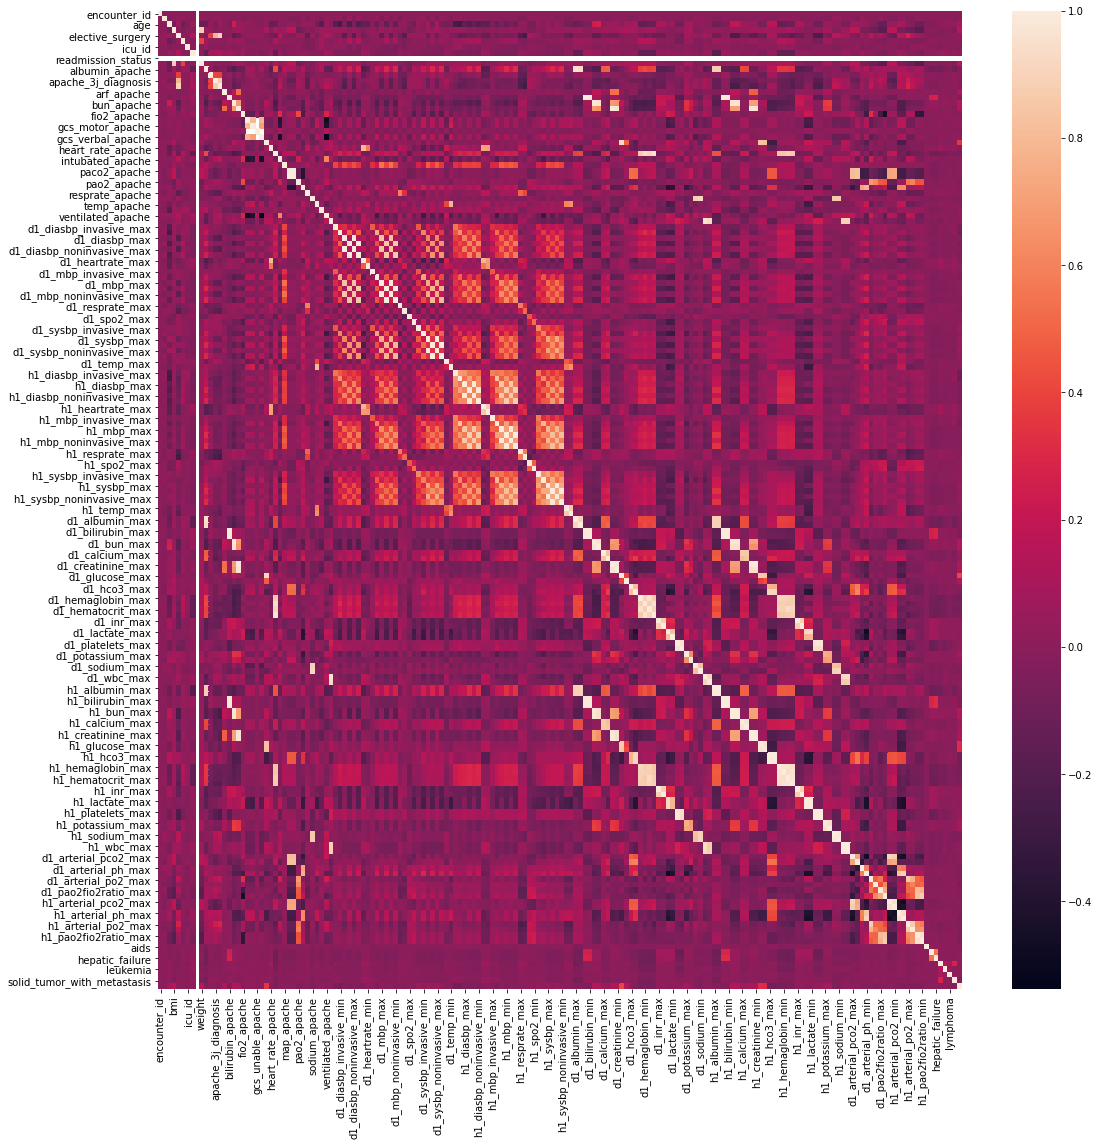

In [34]:
plt.figure(figsize=(18,18))
sns.heatmap(data.corr())

In [35]:
data['readmission_status'].value_counts()

0    130157
Name: readmission_status, dtype: int64

In [36]:
del_cols=low_correlations+['readmission_status']+many_missing_cols

In [37]:
data.drop(del_cols, axis=1,inplace=True)

In [38]:
data.shape

(130157, 42)

<AxesSubplot:>

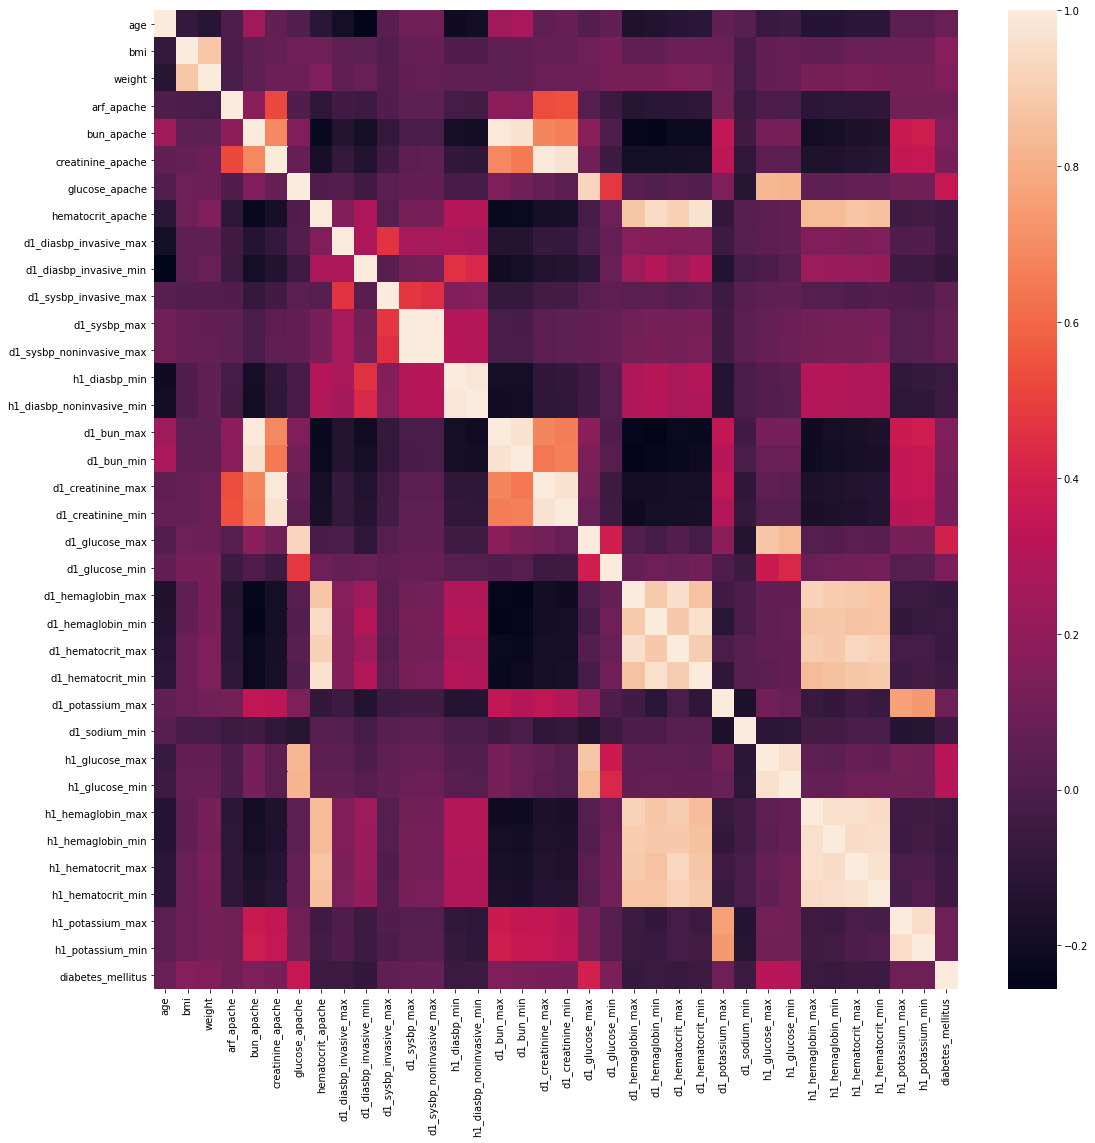

In [39]:
plt.figure(figsize=(18,18))
sns.heatmap(data.corr())

In [40]:
data.drop(['d1_hemaglobin_max','d1_hemaglobin_min','d1_hematocrit_max','h1_glucose_max','d1_sysbp_max','d1_bun_max', 'd1_creatinine_max','h1_diasbp_noninvasive_min' ], axis=1, inplace= True)

In [41]:
data.shape

(130157, 34)

In [42]:
data.drop(['bmi'],axis=1, inplace=True)

In [54]:
data['age']=data['age'].replace([0],np.nan)

In [55]:
numerical_cols=data._get_numeric_data()
numerical_cols.drop(['diabetes_mellitus'],axis=1,inplace=True)

In [56]:
data[data['age']==0]

,age,ethnicity,gender,hospital_admit_source,icu_admit_source,icu_stay_type,icu_type,weight,arf_apache,bun_apache,creatinine_apache,glucose_apache,hematocrit_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_sysbp_invasive_max,d1_sysbp_noninvasive_max,h1_diasbp_min,d1_bun_min,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hematocrit_min,d1_potassium_max,d1_sodium_min,h1_glucose_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_potassium_max,h1_potassium_min,diabetes_mellitus


In [57]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer

In [58]:
si=SimpleImputer(strategy='most_frequent')

In [59]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
mice=IterativeImputer(estimator=lr, verbose=2, max_iter=30, tol=1e-10, imputation_order='roman')

In [60]:
numerical_cols.iloc[:,:]= mice.fit_transform(numerical_cols)

[IterativeImputer] Completing matrix with shape (130157, 26)
[IterativeImputer] Ending imputation round 1/30, elapsed time 3.19
[IterativeImputer] Change: 728.3764912090654, scaled tolerance: 6.7e-08 
[IterativeImputer] Ending imputation round 2/30, elapsed time 6.39
[IterativeImputer] Change: 149.15574209392773, scaled tolerance: 6.7e-08 
[IterativeImputer] Ending imputation round 3/30, elapsed time 9.52
[IterativeImputer] Change: 191.0181109164341, scaled tolerance: 6.7e-08 
[IterativeImputer] Ending imputation round 4/30, elapsed time 12.77
[IterativeImputer] Change: 159.78545667044733, scaled tolerance: 6.7e-08 
[IterativeImputer] Ending imputation round 5/30, elapsed time 16.09
[IterativeImputer] Change: 133.40273067234128, scaled tolerance: 6.7e-08 
[IterativeImputer] Ending imputation round 6/30, elapsed time 19.29
[IterativeImputer] Change: 101.7049491787677, scaled tolerance: 6.7e-08 
[IterativeImputer] Ending imputation round 7/30, elapsed time 22.48
[IterativeImputer] Change

C:\Users\sachi\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:669: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


<AxesSubplot:>

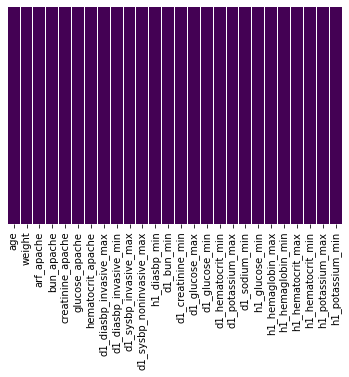

In [61]:
sns.heatmap(numerical_cols.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [62]:
cols=data.columns
num_cols=data._get_numeric_data().columns
cat_cols=list(set(cols)-set(num_cols))
categorical_cols=data[cat_cols]

In [63]:
categorical_cols.iloc[:,:]=si.fit_transform(categorical_cols)

C:\Users\sachi\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-63-bfbbf9691c12>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_cols.iloc[:,:]=si.fit_transform(categorical_cols)


<AxesSubplot:>

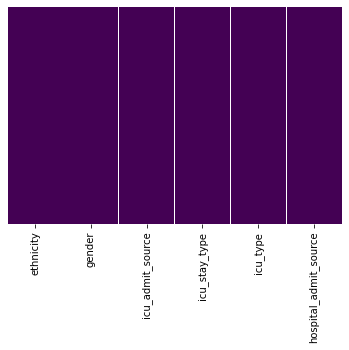

In [64]:
sns.heatmap(categorical_cols.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [65]:
data_new=pd.concat([numerical_cols, data['diabetes_mellitus'],categorical_cols],axis=1)

In [66]:
data_new.shape

(130157, 33)

In [77]:
len(cat_cols)

6

In [78]:
print(cat_cols)

['ethnicity', 'gender', 'icu_admit_source', 'icu_stay_type', 'icu_type', 'hospital_admit_source']


In [67]:
for i in cat_cols:
    i=pd.get_dummies(data_new[i], drop_first=True)
    i=pd.DataFrame(i)
    numerical_cols=pd.concat([numerical_cols, i],axis=1)

In [68]:
data_new=numerical_cols

In [69]:
data_new.shape

(130157, 59)

In [70]:
data_new=pd.concat([data_new, data['diabetes_mellitus']],axis=1)

In [71]:
data_new.shape

(130157, 60)

In [72]:
data_new.reset_index(inplace=True)

In [73]:
data_new.head()

,index,age,weight,arf_apache,bun_apache,creatinine_apache,glucose_apache,hematocrit_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_sysbp_invasive_max,d1_sysbp_noninvasive_max,h1_diasbp_min,d1_bun_min,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hematocrit_min,d1_potassium_max,d1_sodium_min,h1_glucose_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_potassium_max,h1_potassium_min,Asian,Caucasian,Hispanic,Native American,Other/Unknown,M,Floor,Operating Room / Recovery,Other Hospital,Other ICU,readmit,transfer,CSICU,CTICU,Cardiac ICU,MICU,Med-Surg ICU,Neuro ICU,SICU,Chest Pain Center,Direct Admit,Emergency Department,Floor,ICU,ICU to SDU,Observation,Operating Room,Other,Other Hospital,Other ICU,PACU,Recovery Room,Step-Down Unit (SDU),diabetes_mellitus
0,0,68.0,73.900000,0.0,31.000000,2.510000,168.000000,27.400000,46.000000,32.000000,122.000000,131.0,63.0,30.000000,2.230000,168.000000,109.000000,27.400000,4.000000,134.000000,84.202214,10.274742,10.134572,30.572106,30.412333,3.628023,3.698715,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,1,77.0,70.200000,0.0,9.000000,0.560000,145.000000,36.900000,87.190363,46.693135,145.433786,159.0,48.0,9.000000,0.560000,145.000000,128.000000,36.100000,4.200000,145.000000,143.000000,11.300000,11.300000,36.900000,36.900000,4.200000,4.200000,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,2,25.0,95.300000,0.0,18.922290,1.388540,163.765307,33.308845,89.804776,53.775881,153.191577,148.0,58.0,16.152171,1.230906,181.178148,110.087474,33.122308,4.268289,137.374935,150.557672,11.834992,11.801584,35.315008,35.174960,4.039620,4.012047,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,3,81.0,61.700000,0.0,34.391349,1.823279,185.000000,25.900000,62.000000,30.000000,164.000000,158.0,44.0,28.873155,1.452637,185.000000,88.000000,25.900000,5.000000,136.585924,128.004503,11.600000,11.600000,34.000000,34.000000,4.444480,4.433209,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,4,19.0,93.329475,0.0,16.964399,1.344245,161.113195,33.691300,93.359204,57.922253,153.123391,147.0,68.0,14.221231,1.192690,177.999729,108.811940,33.496187,4.225372,137.210701,149.494565,12.036329,12.002987,35.759394,35.633569,4.006130,3.984046,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
M, 

In [74]:
del data_new['index']

In [75]:
data_new.iloc[65536]

age                           89.000000
weight                        67.600000
arf_apache                     0.000000
bun_apache                    51.000000
creatinine_apache              2.420000
glucose_apache               169.000000
hematocrit_apache             32.377725
d1_diasbp_invasive_max        69.340386
d1_diasbp_invasive_min        43.835462
d1_sysbp_invasive_max        140.089185
d1_sysbp_noninvasive_max     127.000000
h1_diasbp_min                 62.000000
d1_bun_min                    51.000000
d1_creatinine_min              2.420000
d1_glucose_max               169.000000
d1_glucose_min               169.000000
d1_hematocrit_min             32.223758
d1_potassium_max               5.200000
d1_sodium_min                134.000000
h1_glucose_min               154.611110
h1_hemaglobin_max             11.208115
h1_hemaglobin_min             11.121502
h1_hematocrit_max             33.959570
h1_hematocrit_min             33.828828
h1_potassium_max               4.900437


In [76]:
data_new.to_csv('C:\\Users\\sachi\\Downloads\\widsdatathon2021\\processed.csv')